In [1]:
import sqlite3, requests, re

conn = sqlite3.connect('final.db')
c = conn.cursor()

response = requests.get("https://www.move.org/lowest-cost-of-living-2022/")
html_source = str(response.content)

#Create Table
c.execute("CREATE TABLE IF NOT EXISTS cities(\
                name varchar(100), \
                state varchar(25), \
                city varchar(100), \
                population int, \
                rent int, \
                transportation int, \
                food int, \
                utilities int, \
                total_income_web_data int, \
                total_income_coli int, \
                median_income int)")

name = []
state = []
city = []
population = []
rent = []
transportation = []
food = []
utilities= []
total_income_web_data = []
total_income_coli = []
median_income = []

#Populates the name list
regex = '<tr class="dynamic-table__row"><th class="dynamic-table__cell dynamic-table__cell--text sticky-column" scope="row">(.*?)</th>'
matches = re.compile(regex).findall(html_source)
name = matches

#Populates the state and city lists
regex = '<td class="dynamic-table__cell dynamic-table__cell--text" >([A-z].*?)</td>'
matches = re.compile(regex).findall(html_source)
x = 5 #start at 5 to cut out the ad table for moving companies
counter = 1
while x < len(matches):
    if counter == 1:
        state.append(matches[x])
        counter = 2
        x += 1
    if counter == 2:
        city.append(matches[x])
        counter = 1
        x += 1

#Populates the population list
regex = '<td class="dynamic-table__cell dynamic-table__cell--text" >([0-9].*?)</td>'
matches = re.compile(regex).findall(html_source)
x = 0
counter = 1
while x < len(matches):
    matches[x] = matches[x].replace(",","")
    if counter == 1:
        population.append(matches[x])
        counter = 2
    else: 
        counter = 1
    x += 1

#Populates the various monetary lists
regex = '<td class="dynamic-table__cell dynamic-table__cell--text" >(\$[0-9].*?)</td>'
matches = re.compile(regex).findall(html_source)
x = 0
counter = 1
while x < len(matches):
    matches[x] = matches[x].replace(",","")
    matches[x] = matches[x].replace("$","")
    if counter == 1:
        rent.append(matches[x])
        counter = 2
    elif counter == 2: 
        transportation.append(matches[x])
        counter = 3
    elif counter == 3: 
        food.append(matches[x])
        counter = 4
    elif counter == 4: 
        utilities.append(matches[x])
        counter = 5
    elif counter == 5: 
        total_income_web_data.append(matches[x])
        counter = 6
    elif counter == 6: 
        total_income_coli.append(matches[x])
        counter = 7
    elif counter == 7: 
        median_income.append(matches[x])
        counter = 1
    x += 1

x = 0
while x < len(median_income):
    c.execute("INSERT INTO cities VALUES ('" + name[x] + "','" + state[x] + "','" + city[x] + "','" + population[x] + "','" + rent[x] + "','" + transportation[x] + "','" + food[x] + "','" + utilities[x] + "','" + total_income_web_data[x] + "','" + total_income_coli[x] + "','" + median_income[x] + "')")
    x += 1

""""
print(len(name))
print(len(state))
print(len(city))
print(len(rent))
print(len(transportation))
print(len(food))
print(len(utilities))
print(len(total_income_web_data))
print(len(total_income_coli))
print(len(median_income))
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Input database into csv file
sql_query = pd.read_sql_query(''' SELECT * FROM cities''', conn)
city_data = pd.DataFrame(sql_query, columns = ['name', 'state', 'city', 'population', 'rent', 'transportation', 'food', 'utilities', 'total_income_web_data', 'total_income_coli', 'median_income'])
print(city_data)


"""

Comparing rent against population

"""

#Plot population against rent
x=city_data[['population']].to_numpy()
y=city_data[['rent']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('rent')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Rent against Population\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('rent')
ax.scatter(x, y)
ax.plot(x,y_est)

"""

Comparing rent against median income

"""

#Plot median income against rent
x=city_data[['median_income']].to_numpy()
y=city_data[['rent']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('median_income')
ax.set_ylabel('rent')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Rent against Median Income\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('median_income')
ax.set_ylabel('rent')
ax.scatter(x, y)
ax.plot(x,y_est)


"""

Comparing food against population

"""
#Plot median income against rent
x=city_data[['population']].to_numpy()
y=city_data[['food']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('food')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Food against Population\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('food')
ax.scatter(x, y)
ax.plot(x,y_est)

"""

Comparing median income against population

"""
#Plot median income against rent
x=city_data[['population']].to_numpy()
y=city_data[['median_income']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('median_income')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Median Income against Population\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('median_income')
ax.scatter(x, y)
ax.plot(x,y_est)

"""

Comparing transportation against population

"""
#Plot median income against rent
x=city_data[['population']].to_numpy()
y=city_data[['transportation']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('transportation')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Transportation against Population\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('transportation')
ax.scatter(x, y)
ax.plot(x,y_est)


"""

Comparing utilities against population

"""
#Plot median income against rent
x=city_data[['population']].to_numpy()
y=city_data[['utilities']].to_numpy()

plt.figure()
ax = plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('utilities')
ax.scatter(x, y)

model = LinearRegression()
model.fit(x, y)

# Coefficient
print ("Utilities against Population\n")
model.intercept_
model.coef_
print ("The coefficient is:", model.coef_)

# R-square
model.score(x, y)
print ("The R-square is:", model.score(x,y))
print("\n")

# Line
y_est = model.predict(x)

ax=plt.axes()
ax.set_xlabel('population')
ax.set_ylabel('utilities')
ax.scatter(x, y)
ax.plot(x,y_est)


#conn.commit()
#c.close()
#conn.close()




IndexError: list index out of range

In [2]:
#Regression

import statsmodels.api as sm
#Specify independent variables (x) and dependent variables (y) from data
x=city_data[['food','transportation','utilities']].to_numpy()
y=city_data[['total_income_web_data']].to_numpy()

#Create and fit a linear regression model
model = LinearRegression()
model.fit(x, y)
print("Coefficients:", model.coef_)
print("R-square:", model.score(x, y))


#Data were loaded before
X=city_data[['food']].to_numpy()
Y=city_data[['total_income_web_data']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

Coefficients: [[ 9.68415635 10.74506078  0.53195757]]
R-square: 0.73179997364408
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     293.0
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.01e-36
Time:                        00:20:13   Log-Likelihood:                -1181.3
No. Observations:                 148   AIC:                             2367.
Df Residuals:                     146   BIC:                             2373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [3]:
#Data were loaded before
X=city_data[['transportation']].to_numpy()
Y=city_data[['total_income_web_data']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     181.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.15e-27
Time:                        00:20:13   Log-Likelihood:                -1202.9
No. Observations:                 148   AIC:                             2410.
Df Residuals:                     146   BIC:                             2416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3202.7644    530.846     -6.033      0.0

In [4]:
#Data were loaded before
X=city_data[['utilities']].to_numpy()
Y=city_data[['total_income_web_data']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     43.79
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.49e-10
Time:                        00:20:13   Log-Likelihood:                -1243.3
No. Observations:                 148   AIC:                             2491.
Df Residuals:                     146   BIC:                             2497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6397    588.714      0.067      0.9

In [21]:
import pandas as pd
from sklearn.cluster import KMeans

In [22]:
df = pd.DataFrame(city_data)
print(city_data)

                                                  name                 state  \
0    San Francisco-San Mateo-Redwood City CA Metro ...            California   
1    New York-Jersey City-White Plains NY-NJ Metro ...              New York   
2                              Urban Honolulu HI Metro                Hawaii   
3                                 Boston MA Metro Div.         Massachusetts   
4    Washington-Arlington-Alexandria DC-VA-MD-WV Me...  District of Columbia   
..                                                 ...                   ...   
143                       Buffalo-Cheektowaga NY Metro              New York   
144                             Oklahoma City OK Metro              Oklahoma   
145                                 Knoxville TN Metro             Tennessee   
146                                     Tulsa OK Metro              Oklahoma   
147                  McAllen-Edinburg-Mission TX Metro                 Texas   

                       city  population

In [23]:
#The most expensive and least expensive cities to live in in the United States

# Calculate the total cost of living for each city
df['total_cost_of_living'] = df['rent'] + df['transportation'] + df['food'] + df['utilities']

In [29]:
# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)


In [30]:
# Fit the model to the data
kmeans.fit(df[['total_cost_of_living']])


C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [31]:
# Assign each city to a cluster
df['cluster'] = kmeans.labels_

In [32]:
# Print the clusters
print(df[['city', 'cluster', 'total_cost_of_living']])

                       city  cluster  total_cost_of_living
0          San Francisco CA        1                  7503
1    New York (Brooklyn) NY        1                  7214
2               Honolulu HI        1                  7151
3                 Boston MA        1                  6789
4             Washington DC        1                  6207
..                      ...      ...                   ...
143              Buffalo NY        0                  2691
144        Oklahoma City OK        0                  2517
145            Knoxville TN        0                  2429
146                Tulsa OK        0                  2325
147              McAllen TX        0                  2214

[148 rows x 3 columns]


In [28]:
#The most expensive cities to live in are clustered together (cluster 1), while the least expensive cities to live in are
#clustered together (cluster 0). 


C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
[[ 609.54166667 2409.70833333  365.375       297.25      ]
 [ 695.76923077 3892.84615385  401.53846154  357.46153846]
 [ 595.46875    1722.1875      369.75        285.65625   ]
 [ 781.6        5372.2         468.2         350.8       ]]

Cluster 0:

              state                   city  food  rent  utilities  \
18     Rhode Island          Providence RI   645  3007        461   
19       New Jersey    Newark-Elizabeth NJ   650  2901        390   
20          Florida            Sarasota FL   655  2824        359   
21          Arizona             Phoenix AZ   612  2820        384   
22         Maryland           Baltimore MD   665  2689        386   
23      Connecticut            Hartford CT   653  2555        455   
24     Pennsylvania        Philadelphia PA   715  2349        408   
25         Colorado              Denver CO   576  2596        305   
26        Louisiana         New Orleans LA   601  2614        285   
27            Texas              Dallas TX 

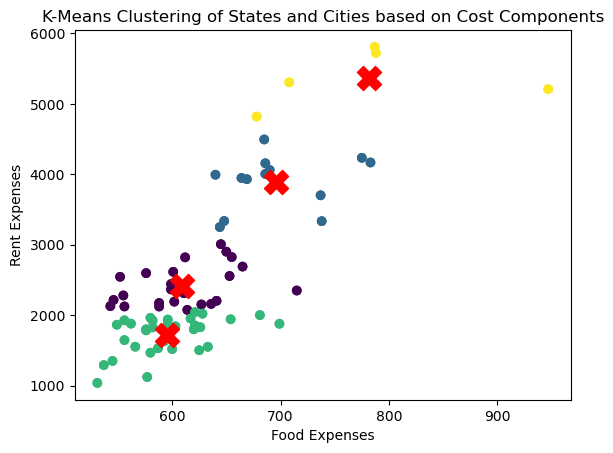

In [35]:
#Cluster states and cities based on their overall cost of living index. This would allow us to identify groups of states 
#and cities with similar costs of living.

# Select relevant features (assuming 'food', 'rent', 'utilities', 'transportation' are numeric)
features = city_data[['food', 'rent', 'utilities', 'transportation']].astype(float)

# Choose the number of clusters (replace 'n_clusters' with your desired number)
n_clusters = 4

# Create KMeans model and fit to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataset
city_data['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

for cluster_label in range(n_clusters):
    cluster_data = city_data[city_data['Cluster'] == cluster_label]
    print(f"\nCluster {cluster_label}:\n")
    
    # Adjust the column names based on your actual dataset
    print(cluster_data[['state', 'city', 'food', 'rent', 'utilities', 'transportation']])
    

# Visualize the clusters
plt.scatter(city_data['food'], city_data['rent'], c=city_data['Cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='red')
plt.title('K-Means Clustering of States and Cities based on Cost Components')
plt.xlabel('Food Expenses')
plt.ylabel('Rent Expenses')
plt.show()

In [14]:
#To know the ratio of median income to total cost of living (including food, utilities, rent, and transportation).

# Calculate the total cost of living for each city
df['total_cost_of_living'] = df['food'] + df['utilities'] + df['rent'] + df['transportation']

# Calculate the ratio of median income to total cost of living
df['income_to_cost_ratio'] = df['median_income'] / df['total_cost_of_living']

# Define the number of clusters (you can use techniques like the Elbow Method or silhouette analysis)
num_clusters = 3

# Create the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(df[['income_to_cost_ratio']])

# Add cluster labels to the dataframe
df["cluster"] = kmeans.labels_

# Print the results
print(df)

C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manal\OneDrive\Documents\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                                                  name                 state  \
0    San Francisco-San Mateo-Redwood City CA Metro ...            California   
1    New York-Jersey City-White Plains NY-NJ Metro ...              New York   
2                              Urban Honolulu HI Metro                Hawaii   
3                                 Boston MA Metro Div.         Massachusetts   
4    Washington-Arlington-Alexandria DC-VA-MD-WV Me...  District of Columbia   
..                                                 ...                   ...   
143                       Buffalo-Cheektowaga NY Metro              New York   
144                             Oklahoma City OK Metro              Oklahoma   
145                                 Knoxville TN Metro             Tennessee   
146                                     Tulsa OK Metro              Oklahoma   
147                  McAllen-Edinburg-Mission TX Metro                 Texas   

                       city  population